<a href="https://colab.research.google.com/github/CakeNuthep/mnist_keras/blob/main/MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(x_train, -1)
X_test = np.expand_dims(x_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


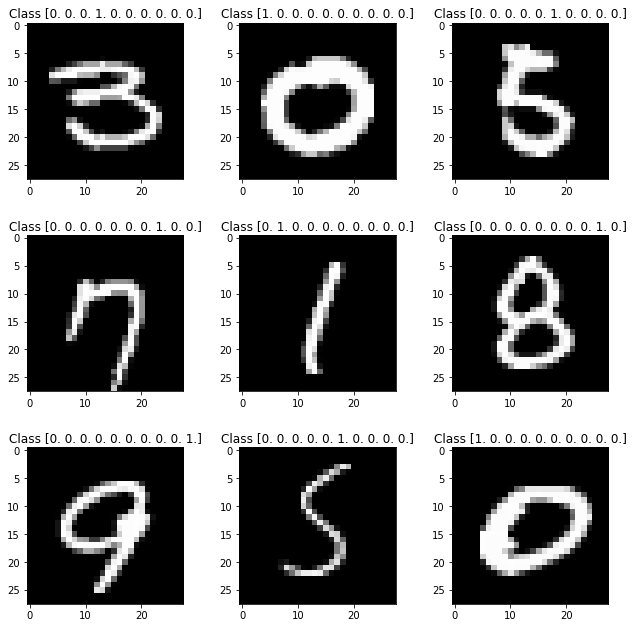

In [ ]:
import matplotlib.pyplot as plt      
import random                      
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
    
plt.tight_layout()

## Build the model

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3),padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128),
        layers.Dense(num_classes,activation="softmax")
    ]
)

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

## Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: 0.4350 - accuracy: 0.8611 - val_loss: 0.0630 - val_accuracy: 0.9823
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9820 - val_loss: 0.0442 - val_accuracy: 0.9878
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0378 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0352 - val_accuracy: 0.9912
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 0.0398 - val_accuracy: 0.9898
Epoch 

## Evaluate the trained model

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04796899855136871
Test accuracy: 0.9901000261306763


In [ ]:
predicted_classes = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


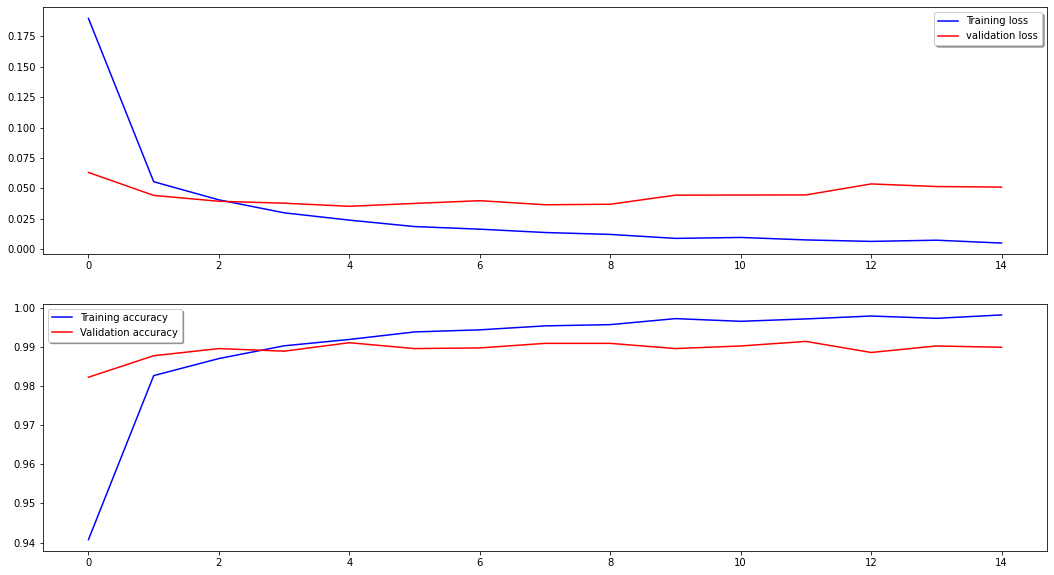

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

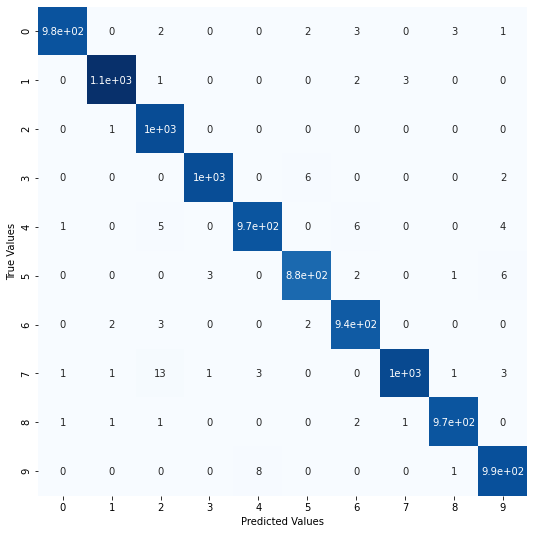

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
y_test = np.argmax(Y_test, 1) # Decode labels

mat = confusion_matrix(y_test, y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

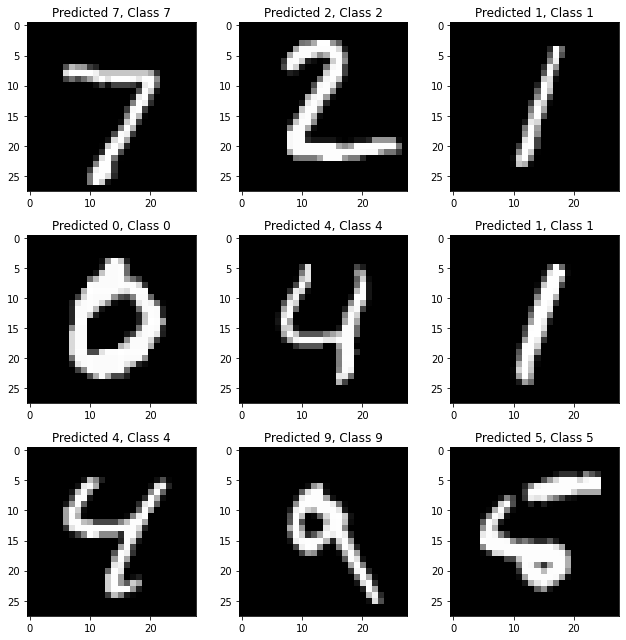

In [ ]:
plt.figure()
for i, predict in enumerate(predicted_classes[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predict, y_test[i]))
    
plt.tight_layout()